<a href="https://colab.research.google.com/github/PulseProgrammer/Genre_Classification/blob/main/Genre_Classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
import keras
import librosa.display
from tensorflow.keras.layers import Input


In [ ]:
songname = f'/content/drive/MyDrive/genres/blues/blues.00000.wav'
y, sr = librosa.load(songname, mono=True, duration=2, offset=0)
ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 256, n_fft = 512, n_mels=128)
ps = librosa.power_to_db(ps**2)
ps.shape

(128, 173)

In [ ]:
dataset = []
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'/content/drive/MyDrive/genres/{genre}'):
        songname = f'/content/drive/MyDrive/genres/{genre}/{filename}'
        for index in range(14):
            y, sr = librosa.load(songname, mono=True, duration=2, offset=index*2)
            ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length = 256, n_fft = 512, n_mels=64)
            ps = librosa.power_to_db(ps**2)
            dataset.append( (ps, genre_number) )

In [ ]:
print(len(dataset))



13986


In [ ]:
import random

random.shuffle(dataset)

train = dataset[:10000]
valid = dataset[10000:12000]
test = dataset[12000:]

X_train, Y_train = zip(*train)
X_valid, Y_valid = zip(*valid)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (64, 173, 1) ) for x in X_train])
X_valid = np.array([x.reshape( (64, 173, 1) ) for x in X_valid])
X_test = np.array([x.reshape( (64, 173, 1) ) for x in X_test])

# One-Hot encoding for classes
Y_train = np.array(keras.utils.to_categorical(Y_train, 10))
Y_valid = np.array(keras.utils.to_categorical(Y_valid, 10))
Y_test = np.array(keras.utils.to_categorical(Y_test, 10))


In [ ]:
print(Y_test.shape)

(1986, 10)


In [ ]:
len(X_train)
X_train.shape
n_features = X_train.shape[2]
input_shape = (None, X_train.shape[1])
print(input_shape)
model_input = Input(input_shape, name='input')
print(model_input)
X_train.shape

(None, 64)
KerasTensor(type_spec=TensorSpec(shape=(None, None, 64), dtype=tf.float32, name='input'), name='input', description="created by layer 'input'")


(10000, 64, 173, 1)

In [ ]:
import keras
# Classification with Keras
# Building our Network
from keras import models
from keras import layers
from keras import Input, backend, Model
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers import Activation
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten, GRU
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
from keras.layers import TimeDistributed

from keras import regularizers
model = Sequential()

model.add(Conv2D(20, (5, 5), input_shape=(64, 173, 1),
                 activation="relu", strides=1, padding="valid"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (5, 5), use_bias=50))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation="relu"))
model.add(Lambda(lambda x: backend.expand_dims(x, axis=-1)))
model.add(LSTM(512, activation="relu", return_sequences=False))
model.add(Dense(10, activation = "softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 169, 20)       520       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 84, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 80, 50)        25050     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 40, 50)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 26000)             0         
                                                                 
 dense (Dense)               (None, 20)                5

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr = 1e-5), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=2)
history_1 = model.fit(X_train, Y_train, epochs=30, batch_size=64, validation_data= (X_test, Y_test), callbacks=[early_stopping])

Epoch 1/30
157/157 [==============================] - 21s 65ms/step - loss: 2.2528 - accuracy: 0.1077 - val_loss: 2.1191 - val_accuracy: 0.1848
Epoch 2/30
157/157 [==============================] - 10s 62ms/step - loss: 2.0769 - accuracy: 0.2256 - val_loss: 1.9420 - val_accuracy: 0.3167
Epoch 3/30
157/157 [==============================] - 10s 63ms/step - loss: 1.8965 - accuracy: 0.3134 - val_loss: 1.8174 - val_accuracy: 0.3283
Epoch 4/30
157/157 [==============================] - 8s 51ms/step - loss: 1.8023 - accuracy: 0.3448 - val_loss: 1.7465 - val_accuracy: 0.3585
Epoch 5/30
157/157 [==============================] - 10s 62ms/step - loss: 1.7266 - accuracy: 0.3756 - val_loss: 1.6763 - val_accuracy: 0.3943
Epoch 6/30
157/157 [==============================] - 10s 63ms/step - loss: 1.6525 - accuracy: 0.3966 - val_loss: 1.5895 - val_accuracy: 0.4099
Epoch 7/30
157/157 [==============================] - 8s 52ms/step - loss: 1.5863 - accuracy: 0.4154 - val_loss: 1.5682 - val_accuracy: 0

In [ ]:
model.save("/content/my_cnn_model.h5")

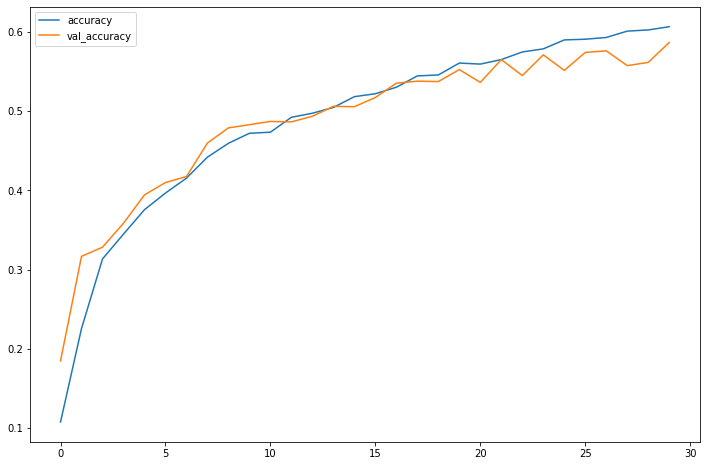

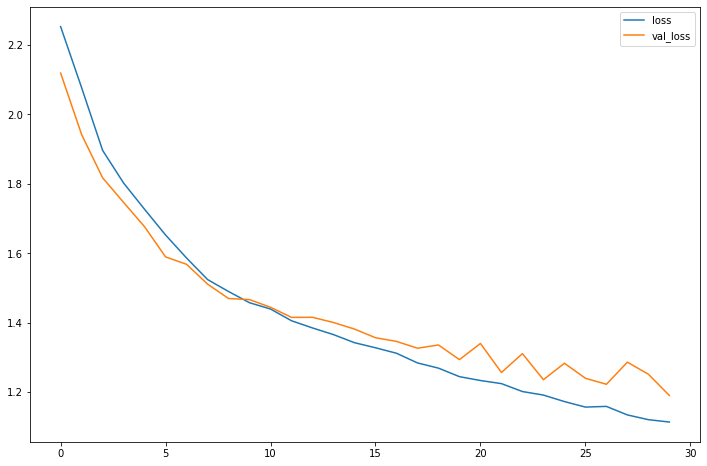

313/313 - 2s - loss: 1.0584 - accuracy: 0.6306 - 2s/epoch - 5ms/step
63/63 - 1s - loss: 1.1904 - accuracy: 0.5866 - 507ms/epoch - 8ms/step
Training accuracy: 0.6305999755859375
Test accuracy: 0.5866062641143799


In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

# Plot the loss and validation loss
plt.figure(figsize=(12,8))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

# Evaluate the model on the training and test data
train_loss, train_acc = model.evaluate(X_train, Y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Training accuracy:', train_acc)
print('Test accuracy:', test_acc)

In [ ]:
import librosa
import numpy as np
from keras.models import load_model

# Load the trained model
model = load_model("/content/my_cnn_model.h5")

# Load and preprocess the audio sample
y, sr = librosa.load("/content/drive/MyDrive/genres/jazz/jazz.00015.wav", mono=True, duration=30)
ps = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=256, n_fft=512, n_mels=64)
ps = librosa.power_to_db(ps**2)
ps = ps.reshape((1, ps.shape[0], ps.shape[1], 1))
print(ps.shape)
ps_cropped = ps[:, :, :173, :]
ps_reshaped = ps_cropped.reshape((-1, 64, 173, 1))


# Make the prediction
prediction = model.predict(ps_reshaped)

# Print the predicted genre
predicted_genre = np.argmax(prediction)
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
print("Predicted genre:", genres[predicted_genre])


(1, 64, 2584, 1)
1/1 [==============================] - 0s 357ms/step
Predicted genre: jazz


In [ ]:
print(prediction)

[[0.04929537 0.08487479 0.02769865 0.02312971 0.00998905 0.64990765
  0.00080715 0.07238799 0.05203059 0.02987906]]


In [ ]:
print(np.argmax(prediction))

5
